In [2]:
# importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pickle
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [3]:
# importing data
data = pd.read_csv(r"C:\Users\91620\Desktop\Deep-Learning-Projects\ANN-Projects\BANK-CHURN-MODELLING-CLASSIFICATION\data\Churn_Modelling.csv")

## Data Exploration

In [4]:
# checking first five rows 
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# description of data 
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# checking shape of data
data.shape

(10000, 14)

In [8]:
# checking null values in data 
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
# some of the columns are not useful for our classification
# dropping irrelavant columns
data = data.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [10]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## EDA

#### CreditScore

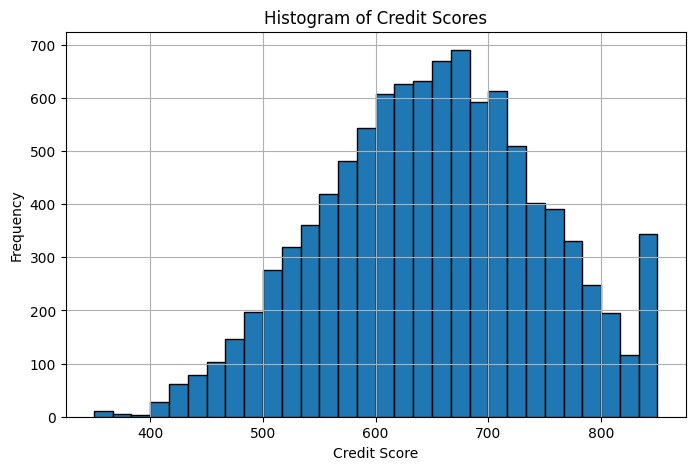

In [11]:
data["CreditScore"].hist(bins=30, edgecolor="black", figsize=(8, 5))
plt.title("Histogram of Credit Scores")
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.show()


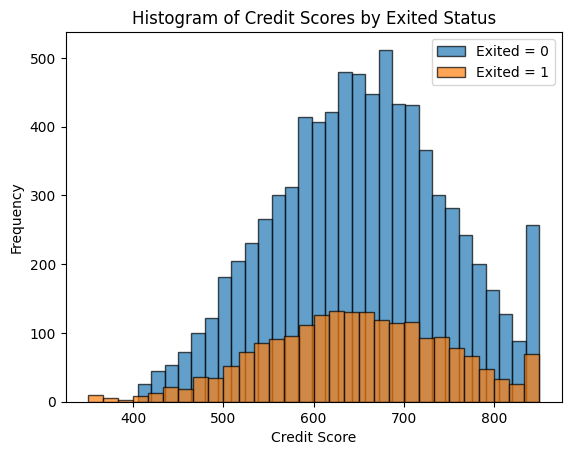

In [12]:
# Filter data
exited_0 = data[data["Exited"] == 0]["CreditScore"]
exited_1 = data[data["Exited"] == 1]["CreditScore"]

# Plot overlaid histograms
plt.hist(exited_0, bins=30, alpha=0.7, label="Exited = 0", edgecolor="black")
plt.hist(exited_1, bins=30, alpha=0.7, label="Exited = 1", edgecolor="black")
plt.title("Histogram of Credit Scores by Exited Status")
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()


The people who exited were having low credit score 

#### Geography

In [13]:
data.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

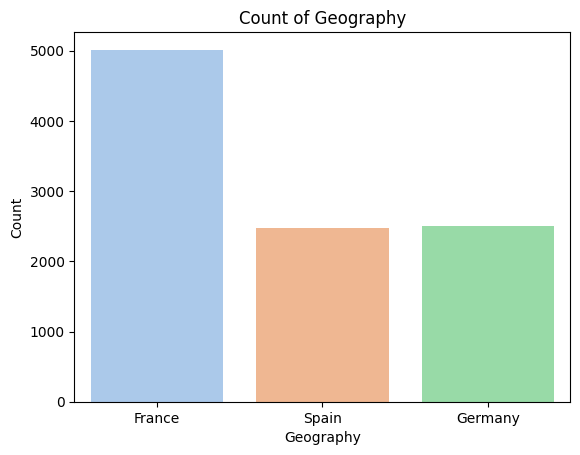

In [14]:
sns.countplot(x="Geography", data=data, palette="pastel")  # You can try other palettes like "coolwarm", "pastel", etc.
plt.title("Count of Geography")
plt.xlabel("Geography")
plt.ylabel("Count")
plt.show()

#### Exited

In [15]:
for i in data.Exited.value_counts():
    print(f"count {i} and percentage {(i/data.shape[0])*100}")

count 7963 and percentage 79.63
count 2037 and percentage 20.369999999999997


As we can see the data is inbalanced 

## Feature Engineering and prepocessing 

#### Geography 

In [16]:
## applying onehot encoding in Geography

onehot_encoder_geo=OneHotEncoder()
geo_encoder=onehot_encoder_geo.fit_transform(data[['Geography']]).toarray()
geo_encoder

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [17]:
onehot_encoder_geo.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [18]:
# creating a dataframe to store it 
geo_encoded_df=pd.DataFrame(geo_encoder,columns=onehot_encoder_geo.get_feature_names_out(['Geography']))
geo_encoded_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [19]:
## Combine one hot encoder columns with the original data
data=pd.concat([data.drop('Geography',axis=1),geo_encoded_df],axis=1)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


#### Gender

In [20]:
## Encode categorical variables
label_encoder_gender=LabelEncoder()
data['Gender']=label_encoder_gender.fit_transform(data['Gender'])
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


In [21]:
## Save the encoders and standardscaler
with open('label_encoder_gender.pkl','wb') as file:
    pickle.dump(label_encoder_gender,file)

with open('onehot_encoder_geo.pkl','wb') as file:
    pickle.dump(onehot_encoder_geo,file)

In [22]:
# Selecting only numerical columns for scaling
numerical_columns = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]
scaler = StandardScaler()

# Scaling numerical columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [23]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,-0.326221,0,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,1.0,0.0,0.0
1,-0.440036,0,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,0.0,0.0,1.0
2,-1.536794,0,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,1.0,0.0,0.0
3,0.501521,0,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,1.0,0.0,0.0
4,2.063884,0,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,0.0,0.0,1.0


In [24]:
## DiVide the dataset into indepent and dependent features
X=data.drop('Exited',axis=1)
y=data['Exited']

## Split the data in training and tetsing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [25]:
X.shape

(10000, 12)

In [26]:
# saving the scaler as pkl file 
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

## ANN 

In [27]:
# importing libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.models import load_model
import datetime


In [28]:
# Set the input shape for the model using the number of features (columns) in X_train.
# The comma ensures it's a tuple, as required by Keras.
(X_train.shape[1],)

(12,)

In [29]:
# Building the model
model = Sequential([
    Dense(128, activation="relu", input_shape=(X_train.shape[1],)), # first hidden layer coonected with input layer
    Dense(128, activation="relu"), # second hidden layer
    Dense(64, activation="relu"), # thrid hidden layer
    Dense(1, activation="sigmoid") # output layer
])



In [30]:
# seeing summary of model and trainable parameters
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,497 (103.50 KB)

 Trainable params: 26,497 (103.50 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [32]:
# Setup Tensorflowboard
# log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorflow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)

In [33]:
# Setup early stopping
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

In [34]:
# Train the model
history = model.fit(X_train, y_train, epochs=100,validation_split=0.2, callbacks=[early_stopping_callback])

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7971 - loss: 0.4720 - val_accuracy: 0.8475 - val_loss: 0.3600
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8484 - loss: 0.3515 - val_accuracy: 0.8388 - val_loss: 0.3621
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8506 - loss: 0.3505 - val_accuracy: 0.8506 - val_loss: 0.3575
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8583 - loss: 0.3462 - val_accuracy: 0.8562 - val_loss: 0.3404
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8681 - loss: 0.3200 - val_accuracy: 0.8537 - val_loss: 0.3400
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8708 - loss: 0.3249 - val_accuracy: 0.8569 - val_loss: 0.3411
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8736 - loss: 0.3072 - val_accuracy: 0.8525 - val_loss: 0.3510
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8684 - loss: 0.3127 - val_accu

In [35]:
model.evaluate(X_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8491 - loss: 0.3422


[0.33995553851127625, 0.8539999723434448]

In [36]:
# saving the model
model.save("model.h5")

## predicting the value 

In [46]:
# loding the trained model
loaded_model = load_model("model.h5")


# loading scaler and encoder
with open("label_encoder_gender.pkl","rb") as file:
    label_encoder_gender = pickle.load(file)

with open("onehot_encoder_geo.pkl","rb") as file1:
    onehot_encoder_geo = pickle.load(file1)

with open("scaler.pkl","rb") as file2:
    scaler = pickle.load(file2)

In [84]:
# coverting dataframe into dictionary
test = data[2:3]  # Slicing the DataFrame
test_dict = test.to_dict(orient="records")[0]  # Convert to dictionary
test_dict

{'CreditScore': -1.536794180222889,
 'Gender': 0,
 'Age': 0.2935174228967471,
 'Tenure': 1.03290776479748,
 'Balance': 1.3330533457228904,
 'NumOfProducts': 2.52705661927622,
 'HasCrCard': 1,
 'IsActiveMember': 0,
 'EstimatedSalary': 0.24068690006348814,
 'Exited': 1,
 'Geography_France': 1.0,
 'Geography_Germany': 0.0,
 'Geography_Spain': 0.0}

In [74]:
# taking sample data for prediction
data[2:3]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
2,-1.536794,0,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,1.0,0.0,0.0


In [75]:
# dropping dependent varible
test = data[2:3]
test.drop(["Exited"], axis = 1, inplace= True)


In [76]:
test

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
2,-1.536794,0,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1.0,0.0,0.0


In [83]:
prediction = loaded_model.predict(test)
if float(prediction[0][0]) > 0.5:
    print("The person is likely to churn")
else:
    print("The person is not likely to churn")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
The person is likely to churn
